In [3]:
import pandas as pd

# To read a CSV file
df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')
#df = pd.DataFrame({'sentence': ['I am very happy', 'I am very sad', 'I am sad but I am happy too']})

from textblob import TextBlob

# The x in the lambda function is a row (because I set axis=1)
# Apply iterates the function accross the dataframe's rows
df['polarity'] = df.apply(lambda x: TextBlob(x['Tweet']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['Tweet']).sentiment.subjectivity, axis=1)

print(df)

#print to csv
df.to_csv("ChatGPT_Textblob.csv", index=False)

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_49637/890587108.py:4: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [6]:
import pandas as pd
from textblob import TextBlob

# To read a CSV file
df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')

# Check for null values
print(df.isnull().sum())

# Drop rows with NaN values in the 'Tweet' column
df = df.dropna(subset=['Tweet'])

# The x in the lambda function is a row (because I set axis=1)
# Apply iterates the function across the DataFrame's rows
df['polarity'] = df.apply(lambda x: TextBlob(x['Tweet']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['Tweet']).sentiment.subjectivity, axis=1)

# Print the DataFrame with the polarity and subjectivity columns
print(df)

# Save the DataFrame to a new CSV file
df.to_csv("Twitter_ChatGPT_Textblob.csv", index=False)

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_49637/1831934437.py:5: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')


Unnamed: 0           38
Date                 18
Tweet                52
Url                  81
User                 81
UserCreated          81
UserVerified         81
UserFollowers        81
UserFriends          81
Retweets            107
Likes                81
Location         119511
Description       22963
dtype: int64
       Unnamed: 0                       Date  \
0               0  2023-04-08 03:33:13+00:00   
1               1  2023-04-08 03:32:16+00:00   
2               2  2023-04-08 03:32:05+00:00   
3               3  2023-04-08 03:31:08+00:00   
4               4  2023-04-08 03:30:51+00:00   
...           ...                        ...   
478342     478261  2022-11-30 18:33:33+00:00   
478343     478262  2022-11-30 18:31:23+00:00   
478344     478263  2022-11-30 18:26:58+00:00   
478345     478264  2022-11-30 18:22:04+00:00   
478346     478265  2022-11-30 18:13:41+00:00   

                                                    Tweet  \
0       #ChatGPT If only there were a

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# To read a CSV file
df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')

# Check for null values
print(df.isnull().sum())

# Drop rows with NaN values in the 'Tweet' column
df = df.dropna(subset=['Tweet'])

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores using VADER
def get_vader_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

# Apply the function to calculate sentiment scores
df['vader_sentiment'] = df['Tweet'].apply(get_vader_sentiment)

# Print the DataFrame with the VADER sentiment scores
print(df)

# Save the DataFrame to a new CSV file
df.to_csv("Twitter_ChatGPT_VADER.csv", index=False)

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_86776/288658806.py:5: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')


Unnamed: 0           38
Date                 18
Tweet                52
Url                  81
User                 81
UserCreated          81
UserVerified         81
UserFollowers        81
UserFriends          81
Retweets            107
Likes                81
Location         119511
Description       22963
dtype: int64
       Unnamed: 0                       Date  \
0               0  2023-04-08 03:33:13+00:00   
1               1  2023-04-08 03:32:16+00:00   
2               2  2023-04-08 03:32:05+00:00   
3               3  2023-04-08 03:31:08+00:00   
4               4  2023-04-08 03:30:51+00:00   
...           ...                        ...   
478342     478261  2022-11-30 18:33:33+00:00   
478343     478262  2022-11-30 18:31:23+00:00   
478344     478263  2022-11-30 18:26:58+00:00   
478345     478264  2022-11-30 18:22:04+00:00   
478346     478265  2022-11-30 18:13:41+00:00   

                                                    Tweet  \
0       #ChatGPT If only there were a

In [1]:
import xlsxwriter
from nrclex import NRCLex as NL
import pandas as pan

# Read the CSV file into a DataFrame
df = pan.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')

# Create a new Excel workbook and worksheet
workbook = xlsxwriter.Workbook('ChatGPT_NRC_Sentiments.xlsx')
worksheet = workbook.add_worksheet()

# Write headers to the worksheet
worksheet.write('A1', 'Tweets')
worksheet.write('B1', 'Fear')
worksheet.write('C1', 'Anger')
worksheet.write('D1', 'Anticipation')
worksheet.write('E1', 'Trust')
worksheet.write('F1', 'Surprise')
worksheet.write('G1', 'Positive')
worksheet.write('H1', 'Negative')
worksheet.write('I1', 'Sadness')
worksheet.write('J1', 'Disgust')
worksheet.write('K1', 'Joy')

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    text = row['Tweet']
    emotion = NL(text)
    d = dict(emotion.top_emotions)
    
    # Write the tweet text to the worksheet
    worksheet.write(i + 1, 0, text)
    
    # Write sentiment values to the worksheet
    for k in ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']:
        if k in d:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, d[k])
        else:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, 0)

# Close the Excel workbook
workbook.close()

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_4626/1893502107.py:6: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pan.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [3]:
import xlsxwriter
from nrclex import NRCLex as NL
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')

# Drop rows with NaN values in the 'Tweet' column
df = df.dropna(subset=['Tweet'])

# Create a new Excel workbook and worksheet
workbook = xlsxwriter.Workbook('ChatGPT_NRC_Sentiments.xlsx')
worksheet = workbook.add_worksheet()

# Write headers to the worksheet
worksheet.write('A1', 'Tweets')
worksheet.write('B1', 'Fear')
worksheet.write('C1', 'Anger')
worksheet.write('D1', 'Anticipation')
worksheet.write('E1', 'Trust')
worksheet.write('F1', 'Surprise')
worksheet.write('G1', 'Positive')
worksheet.write('H1', 'Negative')
worksheet.write('I1', 'Sadness')
worksheet.write('J1', 'Disgust')
worksheet.write('K1', 'Joy')

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    text = row['Tweet']
    emotion = NL(text)
    d = dict(emotion.top_emotions)
    
    # Write the tweet text to the worksheet
    worksheet.write(i + 1, 0, text)
    
    # Write sentiment values to the worksheet
    for k in ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']:
        if k in d:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, d[k])
        else:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 1, 0)

# Close the Excel workbook
workbook.close()

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_4626/449661893.py:6: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/abiodunobafemi/Downloads/ChatGPT.csv')


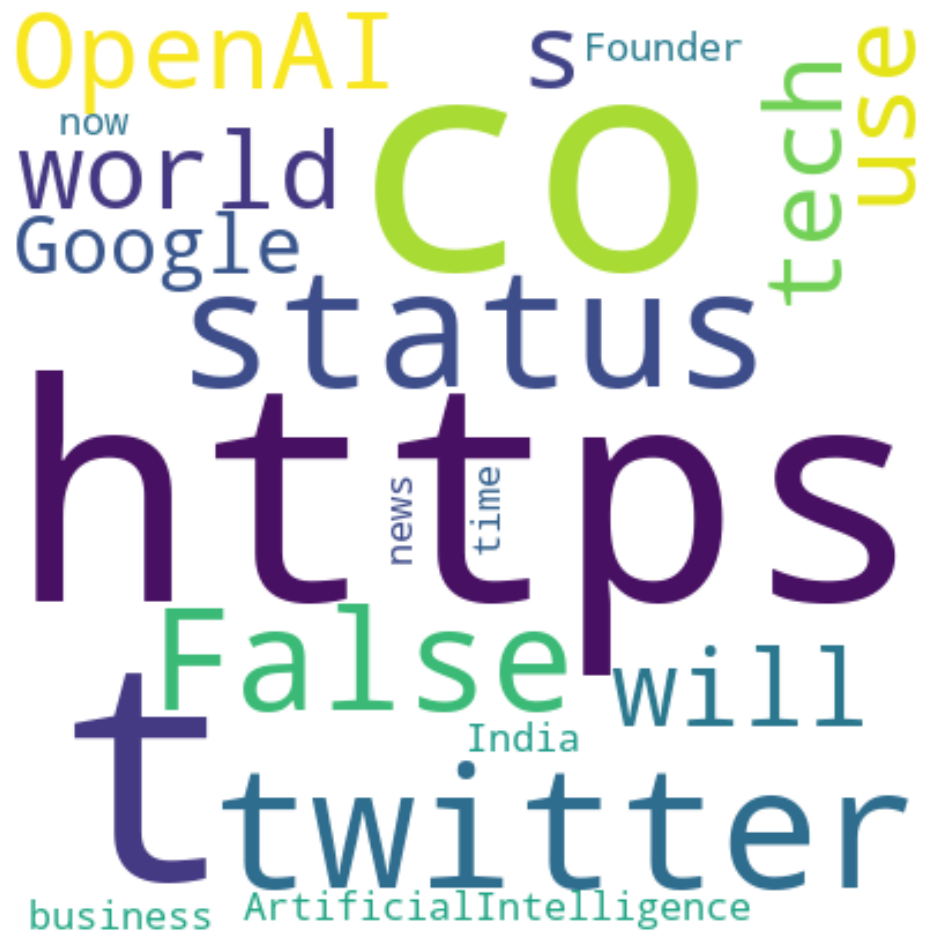

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the contents of the text file
with open('/Users/abiodunobafemi/Downloads/ChatGPT.csv') as f:
    contents = f.read()

# Set up stopwords
stop_words = STOPWORDS
stop_words.update([
    "chatgpt", "gpt", "ai", "ml", "artificial", "intelligence",
    "machine", "learning", "model", "technology", "data", "analysis",
    "nlp", "language", "processing", "python", "code", "github",
    "software", "development", "programming", "tutorial", "project",
    "web", "application", "study", "research", "paper", "article",
    "workshop", "conference", "blog", "post", "tweet", "update",
    "new", "article", "video", "study", "research", "paper", "result",
    "experiment", "findings", "example", "topic", "discussion"
])  # Add additional stopwords

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    height=400,
    width=400,
    collocations=False,
    max_words=20,
    relative_scaling=0
).generate(contents)

# Plot the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to an image file
wordcloud.to_file('ChatGPT_WordCloud.png')

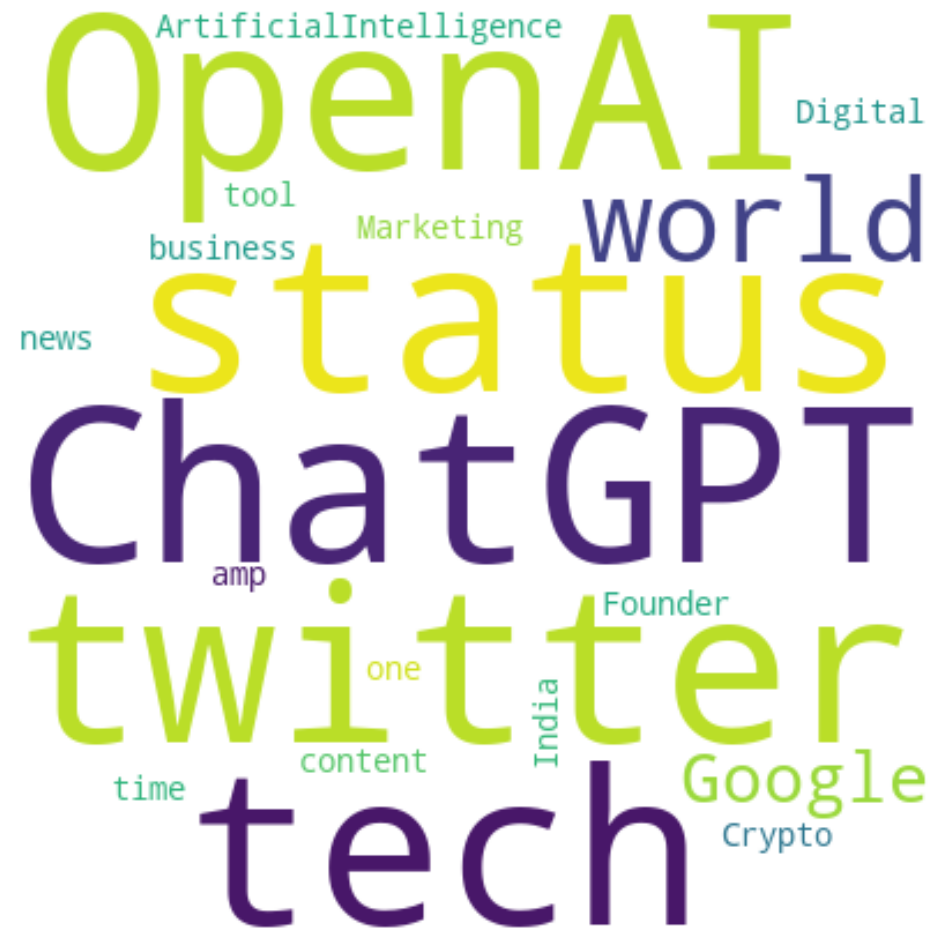

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the contents of the text file
with open('/Users/abiodunobafemi/Downloads/ChatGPT.csv') as f:
    contents = f.read()

# Set up stopwords
stop_words = STOPWORDS
stop_words.update([
    "gpt", "ai", "ml", "artificial", "intelligence",
    "technology", "data", "analysis",
    "nlp", "language", "processing", "python", "code", "github",
    "software", "development", "programming", "tutorial", "project",
    "web", "application", "study", "research", "paper", "article",
    "workshop", "conference", "blog", "post", "tweet", "update",
    "new", "article", "video", "paper", "result", "u", "help",
    "experiment", "findings", "example", "topic", "discussion", "https", "t", "will",
    "false", "use", "s", "now", "co", "using", "make"
])  # Add additional stopwords

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    height=400,
    width=400,
    collocations=False,
    max_words=20,
    relative_scaling=0
).generate(contents)

# Plot the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to an image file
wordcloud.to_file('ChatGPT_WordCloud.png')

In [7]:
import xlsxwriter
from nrclex import NRCLex as NL
import pandas as pd

# Read the CSV file into a DataFrame
csv_path = '/Users/abiodunobafemi/Downloads/ChatGPT.csv'
dtype_options = {'column0_name': str, 'column6_name': str, 'column9_name': str, 'column10_name': str}
df = pd.read_csv(csv_path, dtype=dtype_options, low_memory=False)

# Drop rows with NaN values in the 'Tweet' and 'Date' columns
df = df.dropna(subset=['Tweet', 'Date'])  # Modify 'Date' to match the actual column name in your dataset

# Create a new Excel workbook and worksheet
workbook = xlsxwriter.Workbook('ChatGPT_NRCLexicon_Sentiments.xlsx')
worksheet = workbook.add_worksheet()

# Write headers to the worksheet
worksheet.write('A1', 'Tweets')
worksheet.write('B1', 'Fear')
worksheet.write('C1', 'Anger')
worksheet.write('D1', 'Anticipation')
worksheet.write('E1', 'Trust')
worksheet.write('F1', 'Surprise')
worksheet.write('G1', 'Positive')
worksheet.write('H1', 'Negative')
worksheet.write('I1', 'Sadness')
worksheet.write('J1', 'Disgust')
worksheet.write('K1', 'Joy')

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    date = row['Date']  # Modify 'Date' to match the actual column name in your dataset
    text = row['Tweet']
    emotion = NL(text)
    d = dict(emotion.top_emotions)
    
    # Write date and tweet text to the worksheet
    worksheet.write(i + 1, 0, date)
    worksheet.write(i + 1, 1, text)
    
    # Write sentiment values to the worksheet
    for k in ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']:
        if k in d:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 2, d[k])
        else:
            worksheet.write(i + 1, ['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'].index(k) + 2, 0)

# Close the Excel workbook
workbook.close()

In [2]:
import pandas as pd
from datetime import datetime

# Replace 'your_file.xlsx' with the actual file path
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/CAHSI/ChatGPT/ChatGPT_NRCLexicon_Sentiments.xlsx')

# Assuming your date column is named 'Date' and sentiment scores are in 'Sentiment' column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

average_by_month = df.groupby('Month')['Fear'].mean()

# Create a new DataFrame with months and corresponding average sentiment scores
result_df = pd.DataFrame({
    'Month': average_by_month.index,
    'Average_Sentiment': average_by_month.values
})

# Replace 'output_file.xlsx' with your desired output file name
result_df.to_excel('ChatGPT_AvgFear.xlsx', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/abiodunobafemi/Documents/Research/CAHSI/ChatGPT/ChatGPT_NRCLexicon_Sentiments.xlsx'

In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual file path
df = pd.read_excel('/Users/abiodunobafemi/Documents/Research/CAHSI/ChatGPT/ChatGPT_NRCLexicon_Sentiments.xlsx')

# Convert 'Date' column to datetime, and handle errors by setting invalid dates to NaT (Not a Timestamp)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Date'])

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Group by month and calculate average sentiment
average_by_month = df.groupby('Month')['Fear'].mean()

# Create a new DataFrame with months and corresponding average sentiment scores
result_df = pd.DataFrame({
    'Month': average_by_month.index,
    'Average_Sentiment': average_by_month.values
})

# Replace 'output_file.xlsx' with your desired output file name
result_df.to_excel('ChatGPT_AvgFear.xlsx', index=False)


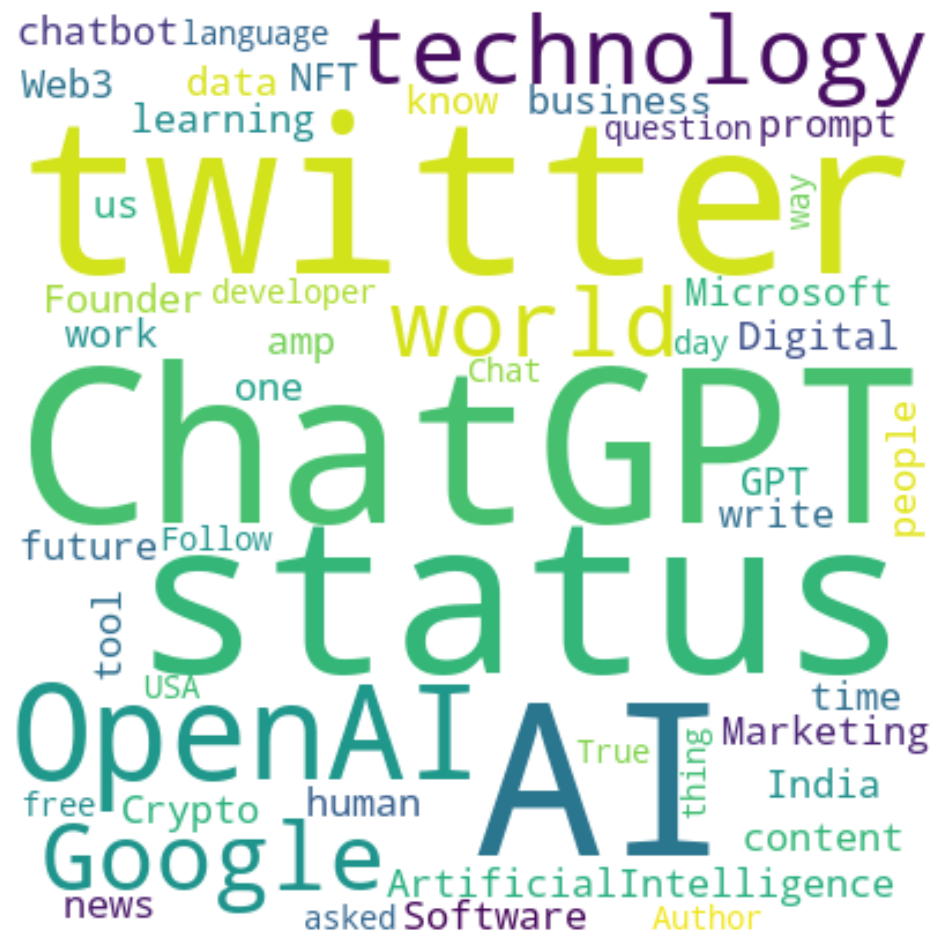

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the contents of the text file
with open('/Users/abiodunobafemi/Downloads/ChatGPT.csv') as f:
    contents = f.read()

# Set up stopwords
stop_words = STOPWORDS
stop_words.update([
    "ml", "artificial", "intelligence",
    "tech", "github","tutorial", "project", "web", "application", 
    "study", "research", "paper", "article", "workshop", "conference", "blog", 
    "post", "tweet", "update", "new", "article", "video", "paper", "result", "u", "help",
    "experiment", "findings", "example", "topic", "discussion", "https", "t", "will",
    "false", "use", "s", "now", "co", "using", "make"
])  # Add additional stopwords

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    height=400,
    width=400,
    collocations=False,
    max_words=50,
    relative_scaling=0
).generate(contents)

# Plot the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to an image file
wordcloud.to_file('Twitter_ChatGPT_WordCloud.png')

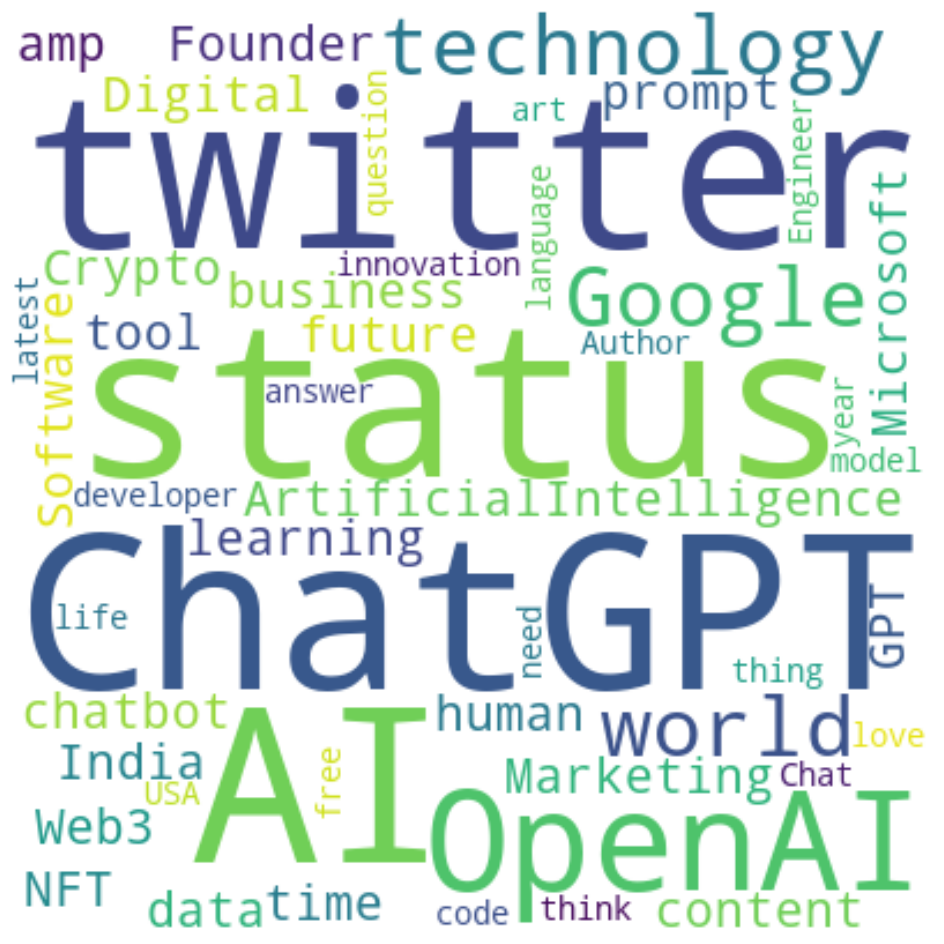

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the contents of the text file
with open('/Users/abiodunobafemi/Downloads/ChatGPT.csv') as f:
    contents = f.read()

# Set up stopwords
stop_words = STOPWORDS
stop_words.update([
    "ml", "artificial", "intelligence", "us", "know", "way", "day",
    "tech", "github","tutorial", "project", "web", "application", "one", "true",
    "study", "research", "paper", "article", "workshop", "conference", "blog", 
    "post", "tweet", "update", "new", "article", "video", "paper", "result", "u", "help",
    "experiment", "findings", "example", "topic", "discussion", "https", "t", "will",
    "false", "use", "s", "now", "co", "using", "make", "work", "write", "people", "follow", "time"
    "thing", "asked", "news"
])  # Add additional stopwords

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    height=400,
    width=400,
    collocations=False,
    max_words=50,
    relative_scaling=0
).generate(contents)

# Plot the word cloud
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0)
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to an image file
wordcloud.to_file('Twitter_ChatGPT_WordCloud.png')

In [2]:
import stanza
import pandas as pd

# Download the necessary Stanza model for English, which includes sentiment analysis
stanza.download('en')  # English language model with sentiment included

# Initialize Stanza pipeline for sentiment analysis
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

# Load the dataset
file_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/cleaned_chatgpt_reddit_comments.xlsx'
df = pd.read_excel(file_path)

# Ensure the relevant column exists
if 'cleaned_comment' in df.columns:
    # Function to process sentiment for each comment
    def sentiment_analysis(comment):
        doc = nlp(comment)
        sentiments = []
        for sentence in doc.sentences:
            sentiments.append(sentence.sentiment)  # sentiment is 0 (negative), 1 (neutral), 2 (positive)
        return sentiments

    # Apply sentiment analysis to each comment
    df['sentiment'] = df['cleaned_comment'].apply(lambda x: sentiment_analysis(str(x)))
else:
    print("Column 'cleaned_comment' not found in the dataset")

# Display the DataFrame with sentiment analysis results
print(df[['cleaned_comment', 'sentiment']].head())

# Optionally, save the processed results to a new Excel file
df.to_excel('/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/Stanza_ChatGPT_Reddit.xlsx', index=False)

2024-09-24 10:15:24 INFO: Downloaded file to /Users/abiodunobafemi/stanza_resources/resources.json
2024-09-24 10:15:24 INFO: Downloading default packages for language: en (English) ...
2024-09-24 10:15:28 INFO: File exists: /Users/abiodunobafemi/stanza_resources/en/default.zip
2024-09-24 10:15:35 INFO: Finished downloading models and saved to /Users/abiodunobafemi/stanza_resources
2024-09-24 10:15:35 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-09-24 10:15:35 INFO: Downloaded file to /Users/abiodunobafemi/stanza_resources/resources.json
2024-09-24 10:15:35 WARNING: Language en package default expects mwt, which has been added
2024-09-24 10:15:36 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | combined       |
| mwt       | combined       |
| sentiment | sstplus_charlm |

2024-09-24 10:15:36 INFO: Using device: cpu
2024-09-24 10:15:36 INFO: Loading: tokenize
2024-09-24 10:15:36 INFO: Loading: mwt
2024-09-24 10:15:36 INFO: Loading: sentiment
2024-09-24 10:15:37 INFO: Done loading processors!


KeyboardInterrupt: 

In [4]:
import time
import stanza
import pandas as pd
from tqdm import tqdm

# Register tqdm with pandas to enable the progress bar functionality
tqdm.pandas()

# Load Stanza pipeline for sentiment analysis
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', verbose=False)

# Load the dataset
file_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/cleaned_chatgpt_reddit_comments.xlsx'
df = pd.read_excel(file_path)

# Ensure the relevant column exists
if 'cleaned_comment' in df.columns:
    
    # Function to process sentiment for each comment
    def sentiment_analysis(comment):
        doc = nlp(comment)
        sentiments = []
        for sentence in doc.sentences:
            sentiments.append(sentence.sentiment)  # sentiment is 0 (negative), 1 (neutral), 2 (positive)
        return sentiments

    # Apply sentiment analysis with logging and a progress bar to the full dataset
    start_time = time.time()
    df['sentiment'] = df['cleaned_comment'].progress_apply(lambda x: sentiment_analysis(str(x)))
    end_time = time.time()
    
    print(f"Sentiment analysis completed on full dataset in {end_time - start_time:.2f} seconds")

    # Display a portion of the DataFrame with sentiment analysis results
    print(df[['cleaned_comment', 'sentiment']].head())

    # Save the processed results to a new Excel file
    output_file = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/Stanza_ChatGPT_Reddit.xlsx'
    df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")
    
else:
    print("Column 'cleaned_comment' not found in the dataset")

  6%|█▋                             | 2955/52416 [10:16:34<172:00:10, 12.52s/it]


KeyboardInterrupt: 

In [ ]:
come back ^

In [1]:
import time
import stanza
import pandas as pd
from tqdm import tqdm

# Register tqdm with pandas to enable the progress bar functionality
tqdm.pandas()

# Load Stanza pipeline for sentiment analysis
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', verbose=False)

# Load the dataset
file_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/cleaned_chatgpt_reddit_comments.xlsx'
df = pd.read_excel(file_path)

# Ensure the relevant column exists
if 'cleaned_comment' in df.columns:
    # Test with a small subset for now (adjust size as needed, e.g., 100 comments)
    df_sample = df.head(1000).copy()  # Create an explicit copy of the DataFrame slice
    
    # Function to process sentiment for each comment
    def sentiment_analysis(comment):
        doc = nlp(comment)
        sentiments = []
        for sentence in doc.sentences:
            sentiments.append(sentence.sentiment)  # sentiment is 0 (negative), 1 (neutral), 2 (positive)
        return sentiments

    # Apply sentiment analysis with logging and a progress bar
    start_time = time.time()
    df_sample['sentiment'] = df_sample['cleaned_comment'].progress_apply(lambda x: sentiment_analysis(str(x)))
    end_time = time.time()
    
    print(f"Sentiment analysis completed on sample in {end_time - start_time:.2f} seconds")

    # Display the DataFrame with sentiment analysis results
    print(df_sample[['cleaned_comment', 'sentiment']].head())
    
    # Optionally, save the processed results to a new Excel file
    df_sample.to_excel('/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/Stanza_ChatGPT_Reddit.xlsx', index=False)
    
else:
    print("Column 'cleaned_comment' not found in the dataset")

100%|███████████████████████████████████████| 1000/1000 [40:08<00:00,  2.41s/it]


Sentiment analysis completed on sample in 2408.07 seconds
                                     cleaned_comment     sentiment
0  ive been shocked for days now i dont need clic...           [0]
1   \n\ni am so angry right now i just wasted my ...  [0, 0, 0, 0]
2  chatgpt karma whoring is here folks just when ...           [0]
3                                   worked on me ngl           [2]
4  certified 1010 mustsee moment it really did sh...           [2]


In [4]:
import pandas as pd
import stanza
from tqdm import tqdm
import time

# Load the Stanza English model (make sure you have downloaded the model beforehand)
stanza.download('en')
nlp = stanza.Pipeline('en')

# File paths
csv_file_path = '/Users/abiodunobafemi/Documents/Research/McNair/ChatGPT_Nov-Apr.csv'
output_excel_path = '/Users/abiodunobafemi/Documents/Research/McNair/sentiment_analysis_output_with_progress.xlsx'

# Load CSV file
try:
    df = pd.read_csv(csv_file_path)
    print("CSV file read successfully.")
    print(df.head())  # Display the first few rows of the dataframe
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Ensure the relevant column 'Tweet' exists
if 'Tweet' in df.columns:
    print("'Tweet' column found. Proceeding with sentiment analysis.")
    
    # Sample 1000 tweets for analysis
    df_sample = df.head(1000)  # Adjust size as needed

    # Function to perform sentiment analysis on each tweet
    def analyze_sentiment(tweet):
        doc = nlp(tweet)
        for sentence in doc.sentences:
            return sentence.sentiment  # Returns the sentiment score (0=negative, 1=neutral, 2=positive)

    # Start the timer
    start_time = time.time()

    # Apply sentiment analysis with a progress bar
    tqdm.pandas(desc="Analyzing Sentiment")
    df_sample['Sentiment'] = df_sample['Tweet'].progress_apply(analyze_sentiment)

    # End the timer
    end_time = time.time()
    
    # Print completion message with elapsed time
    print(f"Sentiment analysis completed on sample in {end_time - start_time:.2f} seconds.")

    # Save the resulting dataframe with sentiment analysis to a new Excel file
    try:
        df_sample.to_excel(output_excel_path, index=False)
        print(f"Sentiment analysis results saved to {output_excel_path}")
    except Exception as e:
        print(f"Error saving the Excel file: {e}")

else:
    print("'Tweet' column not found in the dataset.")

2024-09-26 01:10:37 INFO: Downloaded file to /Users/abiodunobafemi/stanza_resources/resources.json
2024-09-26 01:10:37 INFO: Downloading default packages for language: en (English) ...
2024-09-26 01:10:40 INFO: File exists: /Users/abiodunobafemi/stanza_resources/en/default.zip
2024-09-26 01:10:47 INFO: Finished downloading models and saved to /Users/abiodunobafemi/stanza_resources
2024-09-26 01:10:47 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-09-26 01:10:48 INFO: Downloaded file to /Users/abiodunobafemi/stanza_resources/resources.json
2024-09-26 01:10:49 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-09-26 01:10:49 INFO: Using device: cpu
2024-09-26 01:10:49 INFO: Loading: tokenize
2024-09-26 01:10:49 INFO: Loading: mwt
2024-09-26 01:10:49 INFO: Loading: pos
2024-09-26 01:10:50 INFO: Loading: lemma
2024-09-26 01:10:50 INFO: Loading: constituency
2024-09-26 01:10:51 INFO: Loading: depparse
2024-09-26 01:10:52 INFO: Loading: sentiment
2024-09-26 01:10:52 INFO: Loadi

CSV file read successfully.
  Unnamed: 0                       Date  \
0          0  2023-04-08 03:33:13+00:00   
1          1  2023-04-08 03:32:16+00:00   
2          2  2023-04-08 03:32:05+00:00   
3          3  2023-04-08 03:31:08+00:00   
4          4  2023-04-08 03:30:51+00:00   

                                               Tweet  \
0  #ChatGPT If only there were a movie or somethi...   
1  Workshop Description: In this workshop, you wi...   
2  New Post at AiNewsDrop!\n\nChatGPT is a doctor...   
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   

                                                 Url           User  \
0  https://twitter.com/kirbydjohnson/status/16445...  kirbydjohnson   
1  https://twitter.com/UniversityWeb/status/16445...  UniversityWeb   
2  https://twitter.com/AiNewsDrop/status/16445436...     AiNewsDrop   
3  https://twitter.com/tubeblogger/status/1644543...    tubeblogger   
4  https://twitter.co

Analyzing Sentiment: 100%|████████████████| 1000/1000 [1:28:10<00:00,  5.29s/it]
/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_2500/512764471.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Sentiment'] = df_sample['Tweet'].progress_apply(analyze_sentiment)


Sentiment analysis completed on sample in 5290.14 seconds.
Sentiment analysis results saved to /Users/abiodunobafemi/Documents/Research/McNair/sentiment_analysis_output_with_progress.xlsx


In [5]:
import pandas as pd

# Load the Excel file
file_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/Stanza_ChatGPT_Reddit.xlsx'
output_excel_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/AVGStanza_ChatGPT_Reddit.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Excel file read successfully.")
    print(df.head())  # Display the first few rows of the dataframe
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    exit()

# Check if the 'sentiment' column exists
if 'sentiment' in df.columns:
    # Extract numerical values from lists in 'sentiment' column
    # This assumes that the sentiment values are stored as lists (e.g., "[2]")
    df['sentiment'] = df['sentiment'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)

    # Convert 'sentiment' to numeric type
    df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

    # Calculate the average sentiment
    average_sentiment = df['sentiment'].mean()
    print(f"The average sentiment is: {average_sentiment:.2f}")

    # Optionally, save the average sentiment to a new Excel file
    average_df = pd.DataFrame({'Average Sentiment': [average_sentiment]})
    average_df.to_excel(output_excel_path, index=False)
    print(f"Average sentiment saved to {output_excel_path}")

else:
    print("'sentiment' column not found in the dataset.")

Excel file read successfully.
   g comment_id comment_parent_id  \
0  0    iztdxuh         t3_zj2aeu   
1  1    iztn0q0         t3_zj2aeu   
2  2    izudrph         t3_zj2aeu   
3  3    iztfhtb         t3_zj2aeu   
4  4    izu2as9         t3_zj2aeu   

                                        comment_body  subreddit  \
0  I've been shocked for days now, I don't need c...  r/ChatGPT   
1   \n\nI am so angry right now. I just wasted my...  r/ChatGPT   
2  chatgpt karma whoring is here folks! just when...  r/ChatGPT   
3                                 Worked on me, ngl.  r/ChatGPT   
4  Certified 10/10, must-see moment. It really di...  r/ChatGPT   

                                     cleaned_comment  \
0  ive been shocked for days now i dont need clic...   
1   \n\ni am so angry right now i just wasted my ...   
2  chatgpt karma whoring is here folks just when ...   
3                                   worked on me ngl   
4  certified 1010 mustsee moment it really did sh...   

       

In [1]:
import time
import pandas as pd
from tqdm import tqdm
from flair.models import TextClassifier
from flair.data import Sentence

# Load the Flair sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

# Load the dataset
file_path = '/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/cleaned_chatgpt_reddit_comments.xlsx'
df = pd.read_excel(file_path)

# Ensure the relevant column exists
if 'cleaned_comment' in df.columns:
    # Test with a small subset for now (adjust size as needed, e.g., 1000 comments)
    df_sample = df.head(1000).copy()  # Create an explicit copy of the DataFrame slice

    # Function to process sentiment for each comment
    def sentiment_analysis(comment):
        sentence = Sentence(comment)
        classifier.predict(sentence)
        return sentence.labels[0].score if sentence.labels else None

    # Apply sentiment analysis with logging and a progress bar
    start_time = time.time()
    tqdm.pandas(desc="Analyzing Sentiment")
    df_sample['sentiment'] = df_sample['cleaned_comment'].progress_apply(lambda x: sentiment_analysis(str(x)))
    end_time = time.time()

    print(f"Sentiment analysis completed on sample in {end_time - start_time:.2f} seconds")

    # Display the DataFrame with sentiment analysis results
    print(df_sample[['cleaned_comment', 'sentiment']].head())

    # Optionally, save the processed results to a new Excel file
    df_sample.to_excel('/Users/abiodunobafemi/Documents/Research/NCUR 2024/Data/Flair_ChatGPT_Reddit.xlsx', index=False)

else:
    print("Column 'cleaned_comment' not found in the dataset")

2024-09-26 02:56:49.253018: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-09-26 02:57:14,611 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/tmp0grq0b2o


100%|████████████████████████████████████████| 253M/253M [01:13<00:00, 3.60MB/s]

2024-09-26 02:58:28,668 copying /var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/tmp0grq0b2o to cache at /Users/abiodunobafemi/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-09-26 02:58:29,199 removing temp file /var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/tmp0grq0b2o


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Analyzing Sentiment: 100%|██████████████████| 1000/1000 [02:14<00:00,  7.43it/s]


Sentiment analysis completed on sample in 134.53 seconds
                                     cleaned_comment  sentiment
0  ive been shocked for days now i dont need clic...   0.991209
1   \n\ni am so angry right now i just wasted my ...   0.999994
2  chatgpt karma whoring is here folks just when ...   0.981115
3                                   worked on me ngl   0.999834
4  certified 1010 mustsee moment it really did sh...   0.997640


In [2]:
import pandas as pd
from tqdm import tqdm
from flair.models import TextClassifier
from flair.data import Sentence
import time

# Load the Flair sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

# File paths
csv_file_path = '/Users/abiodunobafemi/Documents/Research/McNair/ChatGPT_Nov-Apr.csv'
output_excel_path = '/Users/abiodunobafemi/Documents/Research/McNair/Flair_ChatGPT_Twitter.xlsx'

# Load CSV file
try:
    df = pd.read_csv(csv_file_path)
    print("CSV file read successfully.")
    print(df.head())  # Display the first few rows of the dataframe
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Ensure the relevant column 'Tweet' exists
if 'Tweet' in df.columns:
    print("'Tweet' column found. Proceeding with sentiment analysis.")
    
    # Sample 1000 tweets for analysis
    df_sample = df.head(1000)  # Adjust size as needed

    # Function to perform sentiment analysis on each tweet
    def analyze_sentiment(tweet):
        sentence = Sentence(tweet)
        classifier.predict(sentence)
        return sentence.labels[0].score if sentence.labels else None

    # Start the timer
    start_time = time.time()

    # Apply sentiment analysis with a progress bar
    tqdm.pandas(desc="Analyzing Sentiment")
    df_sample['Sentiment'] = df_sample['Tweet'].progress_apply(analyze_sentiment)

    # End the timer
    end_time = time.time()
    
    # Print completion message with elapsed time
    print(f"Sentiment analysis completed on sample in {end_time - start_time:.2f} seconds.")

    # Save the resulting dataframe with sentiment analysis to a new Excel file
    try:
        df_sample.to_excel(output_excel_path, index=False)
        print(f"Sentiment analysis results saved to {output_excel_path}")
    except Exception as e:
        print(f"Error saving the Excel file: {e}")

else:
    print("'Tweet' column not found in the dataset.")

/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_10052/3320496882.py:16: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


CSV file read successfully.
  Unnamed: 0                       Date  \
0          0  2023-04-08 03:33:13+00:00   
1          1  2023-04-08 03:32:16+00:00   
2          2  2023-04-08 03:32:05+00:00   
3          3  2023-04-08 03:31:08+00:00   
4          4  2023-04-08 03:30:51+00:00   

                                               Tweet  \
0  #ChatGPT If only there were a movie or somethi...   
1  Workshop Description: In this workshop, you wi...   
2  New Post at AiNewsDrop!\n\nChatGPT is a doctor...   
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   

                                                 Url           User  \
0  https://twitter.com/kirbydjohnson/status/16445...  kirbydjohnson   
1  https://twitter.com/UniversityWeb/status/16445...  UniversityWeb   
2  https://twitter.com/AiNewsDrop/status/16445436...     AiNewsDrop   
3  https://twitter.com/tubeblogger/status/1644543...    tubeblogger   
4  https://twitter.co

Analyzing Sentiment: 100%|██████████████████| 1000/1000 [03:14<00:00,  5.14it/s]
/var/folders/_z/l3h28b113sxflhpgqg51f3y80000gn/T/ipykernel_10052/3320496882.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Sentiment'] = df_sample['Tweet'].progress_apply(analyze_sentiment)


Sentiment analysis completed on sample in 194.58 seconds.
Sentiment analysis results saved to /Users/abiodunobafemi/Documents/Research/McNair/Flair_ChatGPT_Twitter.xlsx
